In [42]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import svm
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import *
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import StandardScaler,LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn import preprocessing


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
kf = KFold(n_splits=10)

In [43]:
 #data generated from augmented  using xception with augmentation
d_1 = pd.read_csv("features_extraction_Xception+augmentation.csv")

#data generated from augmented  using VGG16 with augmentation
d_2 = pd.read_csv("features_extraction_VGG16+augmentation.csv")

#data generated from augmented  using ResNet50 with augmentation
d_3 = pd.read_csv("features_extraction_ResNet50+augmentation.csv")

#data generated from augmented  using InceptionV3 with augmentation
d_4 = pd.read_csv("features_extraction_InceptionV3+augmentation.csv")

#data generated from augmented  using DensNet201 with augmentation
d_5 = pd.read_csv("features_extraction_DenseNet201+augmentation.csv")

In [77]:
#Distrebution of label Count 
labels=d_1['label'].value_counts()
#pie chart 
fig = px.pie(d_1, values=labels, names=labels.index)
fig.show()

In [45]:
def My_model(X,y):
    #split Data into train test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)
    #onehot encoding for labels ,train and test
    le = preprocessing.LabelEncoder()
    le.fit(y_test)
    test_labels_encoded = le.transform(y_test)
    le.fit(y_train)
    train_labels_encoded = le.transform(y_train)
    #propoes Model
    model=Sequential()
    model.add(Dense(512,input_shape=X_train.shape,activation='relu')) 
    model.add(Dropout(0.20)) #dropout for avoiding over fitting

    model.add(Dense(units=256,activation='relu'))
    model.add(Dropout(0.20))

    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.10))

    model.add(Dense(units=7,activation='softmax')) #for 7 classes
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)#early stopping to avoid overfitting
    mc = ModelCheckpoint('modelalista', monitor='val_loss', mode='min', verbose=1)
    history_1=model.fit(X_train,train_labels_encoded,callbacks = [es,mc],batch_size=10, epochs=500,
                        validation_split=0.20)#fit data for data and tak 20% of train data for validation
    # generate accuracy and loss plots
    plt.plot(history_1.history['accuracy'])
    plt.plot(history_1.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    Y_pred=model.predict_classes(X_test)
    Scores=metrics_scores(Y_pred,y_test,le)
    return Scores

In [46]:
def metrics_scores(y_pred,y_test,le): #for compute the most important  metrics 
    prediction1 = le.inverse_transform(y_pred)
    print ("Accuracy = ", metrics.accuracy_score(y_test, prediction1))
    print ("f1 micro = ", metrics.f1_score(y_test, prediction1,average='micro'))
    print ("f1 macro = ", metrics.f1_score(y_test, prediction1,average='macro'))
    print ("f1 all = ", metrics.f1_score(y_test, prediction1,average=None))
    print ("prec micro = ", metrics.precision_score(y_test, prediction1,average='micro'))
    print ("prec macro = ", metrics.precision_score(y_test, prediction1,average='macro'))
    print ("prec all = ", metrics.precision_score(y_test, prediction1,average=None))

    print ("recall micro = ", metrics.recall_score(y_test, prediction1,average='micro'))
    print ("recall macro = ", metrics.recall_score(y_test, prediction1,average='macro'))
    print ("recall all = ", metrics.recall_score(y_test, prediction1,average=None))

    cm = confusion_matrix(y_test, prediction1)#generate confusion matrix
    #print(cm)
    
    print(sns.heatmap(cm, annot=True))#print confusion matrix as heatmap


# bulid the model using Xception generated features then evaluate the model

Epoch 1/500
122/122 [==============================] - 7s 19ms/step - loss: 11.4951 - accuracy: 0.2348 - val_loss: 1.0303 - val_accuracy: 0.5559

Epoch 00001: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 2/500
122/122 [==============================] - 1s 9ms/step - loss: 1.5857 - accuracy: 0.4294 - val_loss: 1.1554 - val_accuracy: 0.4934

Epoch 00002: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 3/500
122/122 [==============================] - 1s 9ms/step - loss: 1.3631 - accuracy: 0.4841 - val_loss: 0.8174 - val_accuracy: 0.7007

Epoch 00003: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 4/500
122/122 [==============================] - 1s 9ms/step - loss: 0.9948 - accuracy: 0.6058 - val_loss: 0.6534 - val_accuracy: 0.8388

Epoch 00004: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 5/500
122/122 [=====================

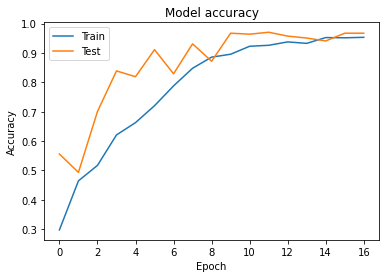

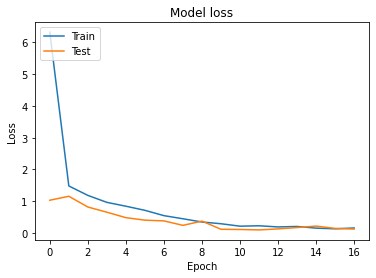

C:\Users\mrmot\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy =  0.952755905511811
f1 micro =  0.952755905511811
f1 macro =  0.9491780084198743
f1 all =  [0.93670886 0.95384615 0.95145631 0.89189189 0.95035461 0.99029126
 0.96969697]
prec micro =  0.952755905511811
prec macro =  0.943117648728445
prec all =  [0.88095238 1.         0.98       0.80487805 1.         0.98076923
 0.95522388]
recall micro =  0.952755905511811
recall macro =  0.9609019711128479
recall all =  [1.         0.91176471 0.9245283  1.         0.90540541 1.
 0.98461538]
AxesSubplot(0.125,0.125;0.62x0.755)


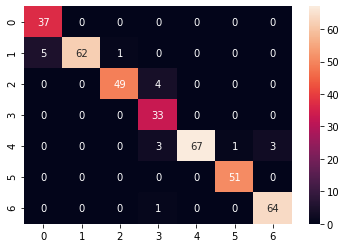

In [47]:
X_1 = d_1.drop(columns = ['label']).values
y_1 = d_1['label'].values
Scores=My_model(X_1,y_1)



# bulid the model using VGG16 generated features the evaluate the model

Epoch 1/500
122/122 [==============================] - 5s 16ms/step - loss: 20.2204 - accuracy: 0.1674 - val_loss: 1.7332 - val_accuracy: 0.2138

Epoch 00001: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 2/500
122/122 [==============================] - 1s 6ms/step - loss: 2.2878 - accuracy: 0.2782 - val_loss: 1.4849 - val_accuracy: 0.4572

Epoch 00002: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 3/500
122/122 [==============================] - 1s 10ms/step - loss: 1.5700 - accuracy: 0.4040 - val_loss: 1.3199 - val_accuracy: 0.3553

Epoch 00003: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 4/500
122/122 [==============================] - 1s 7ms/step - loss: 1.2927 - accuracy: 0.4273 - val_loss: 1.1354 - val_accuracy: 0.5033

Epoch 00004: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 5/500
122/122 [====================

Epoch 31/500
122/122 [==============================] - 1s 9ms/step - loss: 0.4237 - accuracy: 0.8102 - val_loss: 0.2316 - val_accuracy: 0.9079

Epoch 00031: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 32/500
122/122 [==============================] - 1s 7ms/step - loss: 0.4025 - accuracy: 0.8335 - val_loss: 0.5106 - val_accuracy: 0.7336

Epoch 00032: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 33/500
122/122 [==============================] - 1s 6ms/step - loss: 0.4645 - accuracy: 0.8066 - val_loss: 0.2438 - val_accuracy: 0.9408

Epoch 00033: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 34/500
122/122 [==============================] - 1s 10ms/step - loss: 0.4009 - accuracy: 0.8339 - val_loss: 0.3026 - val_accuracy: 0.8914

Epoch 00034: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 35/500
122/122 [=================

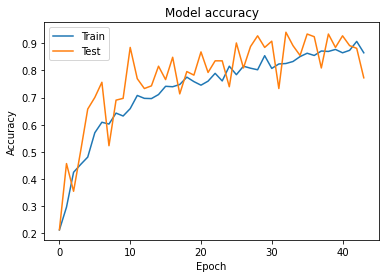

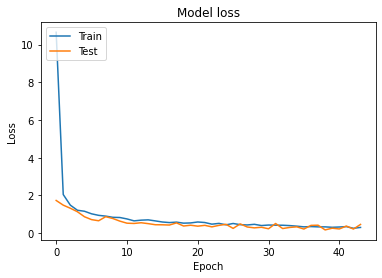

C:\Users\mrmot\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy =  0.7847769028871391
f1 micro =  0.7847769028871391
f1 macro =  0.7758885219195477
f1 all =  [0.97368421 0.97058824 0.97087379 0.6875     0.56962025 0.33333333
 0.92561983]
prec micro =  0.7847769028871391
prec macro =  0.7928940807092067
prec all =  [0.94871795 0.97058824 1.         0.52380952 0.53571429 0.57142857
 1.        ]
recall micro =  0.7847769028871391
recall macro =  0.8027035927146916
recall all =  [1.         0.97058824 0.94339623 1.         0.60810811 0.23529412
 0.86153846]
AxesSubplot(0.125,0.125;0.62x0.755)


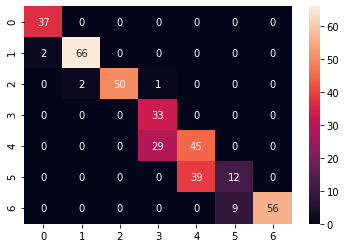

In [48]:
X_2 = d_2.drop(columns = ['label']).values
y_2 = d_2['label'].values
Scores=My_model(X_2,y_2)



# bulid the model using ResNet generated features then evaluate the model

Epoch 1/500
122/122 [==============================] - 5s 18ms/step - loss: 10.9249 - accuracy: 0.2152 - val_loss: 1.5338 - val_accuracy: 0.2961

Epoch 00001: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 2/500
122/122 [==============================] - 1s 9ms/step - loss: 1.7692 - accuracy: 0.3849 - val_loss: 1.3142 - val_accuracy: 0.5197

Epoch 00002: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 3/500
122/122 [==============================] - 1s 9ms/step - loss: 1.2708 - accuracy: 0.4829 - val_loss: 0.9890 - val_accuracy: 0.6250

Epoch 00003: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 4/500
122/122 [==============================] - 2s 14ms/step - loss: 1.2053 - accuracy: 0.4549 - val_loss: 0.8479 - val_accuracy: 0.7368

Epoch 00004: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 5/500
122/122 [====================

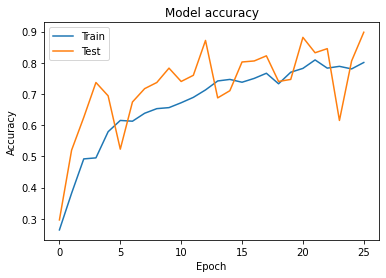

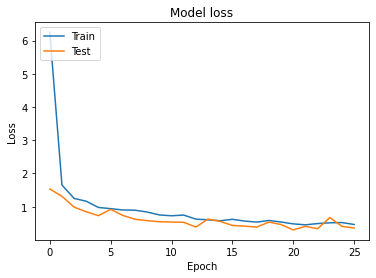

C:\Users\mrmot\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy =  0.9028871391076115
f1 micro =  0.9028871391076115
f1 macro =  0.8815584395878023
f1 all =  [0.95774648 0.97841727 0.90721649 0.57627119 0.87058824 0.90322581
 0.97744361]
prec micro =  0.9028871391076115
prec macro =  0.905472616999129
prec all =  [1.         0.95774648 1.         0.65384615 0.77083333 1.
 0.95588235]
recall micro =  0.9028871391076115
recall macro =  0.8696840750114889
recall all =  [0.91891892 1.         0.83018868 0.51515152 1.         0.82352941
 1.        ]
AxesSubplot(0.125,0.125;0.62x0.755)


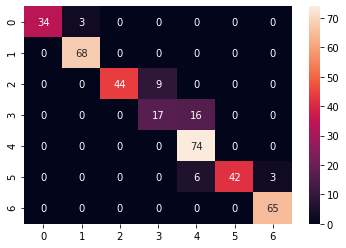

In [49]:
X_3 = d_3.drop(columns = ['label']).values
y_3 = d_3['label'].values
Scores=My_model(X_3,y_3)



# bulid the model using InceptionV3 generated features then evaluate the model

Epoch 1/500
110/110 [==============================] - 4s 18ms/step - loss: 11.4691 - accuracy: 0.3229 - val_loss: 0.6247 - val_accuracy: 0.7645

Epoch 00001: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 2/500
110/110 [==============================] - 1s 12ms/step - loss: 1.3586 - accuracy: 0.6281 - val_loss: 0.6114 - val_accuracy: 0.7826

Epoch 00002: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 3/500
110/110 [==============================] - 1s 7ms/step - loss: 0.7993 - accuracy: 0.7519 - val_loss: 0.4977 - val_accuracy: 0.8080

Epoch 00003: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 4/500
110/110 [==============================] - 1s 12ms/step - loss: 0.6313 - accuracy: 0.8042 - val_loss: 0.4731 - val_accuracy: 0.8659

Epoch 00004: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 5/500
110/110 [===================

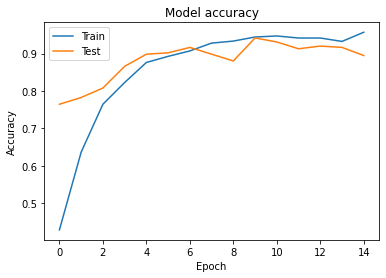

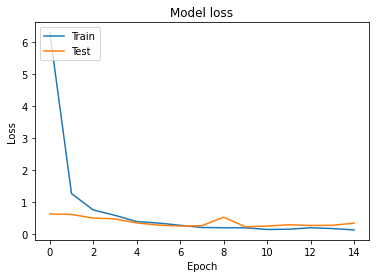

C:\Users\mrmot\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy =  0.9043478260869565
f1 micro =  0.9043478260869565
f1 macro =  0.8950046669014402
f1 all =  [0.98666667 0.95906433 0.87878788 0.88571429 0.88311688 0.90697674
 0.76470588]
prec micro =  0.9043478260869565
prec macro =  0.9111046691403833
prec all =  [1.         0.93181818 1.         0.96875    0.88311688 0.975
 0.61904762]
recall micro =  0.9043478260869565
recall macro =  0.898878892185233
recall all =  [0.97368421 0.98795181 0.78378378 0.81578947 0.88311688 0.84782609
 1.        ]
AxesSubplot(0.125,0.125;0.62x0.755)


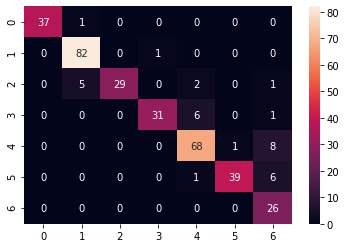

In [50]:
X_4 = d_4.drop(columns = ['label']).values
y_4 = d_4['label'].values
Scores=My_model(X_4,y_4)



# bulid the model using DensNet generated features then evaluate the model

Epoch 1/500
122/122 [==============================] - 2s 7ms/step - loss: 11.0979 - accuracy: 0.2968 - val_loss: 1.4514 - val_accuracy: 0.4836

Epoch 00001: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 2/500
122/122 [==============================] - 1s 5ms/step - loss: 1.6985 - accuracy: 0.4988 - val_loss: 0.7216 - val_accuracy: 0.7368

Epoch 00002: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 3/500
122/122 [==============================] - 1s 4ms/step - loss: 1.0519 - accuracy: 0.6028 - val_loss: 0.5472 - val_accuracy: 0.7467

Epoch 00003: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 4/500
122/122 [==============================] - 1s 4ms/step - loss: 0.7734 - accuracy: 0.7026 - val_loss: 0.3876 - val_accuracy: 0.8586

Epoch 00004: saving model to modelalista
INFO:tensorflow:Assets written to: modelalista\assets
Epoch 5/500
122/122 [======================

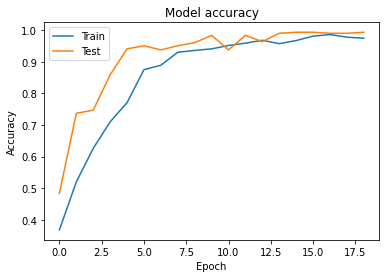

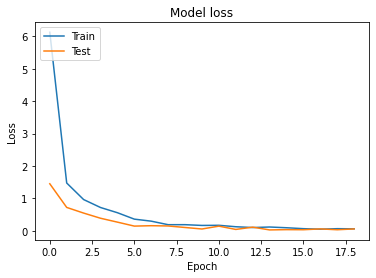

C:\Users\mrmot\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy =  0.989501312335958
f1 micro =  0.989501312335958
f1 macro =  0.9900488150090104
f1 all =  [1.         0.99259259 0.99065421 0.98461538 0.98013245 0.99009901
 0.99224806]
prec micro =  0.989501312335958
prec macro =  0.9917886346457775
prec all =  [1.         1.         0.98148148 1.         0.96103896 1.
 1.        ]
recall micro =  0.989501312335958
recall macro =  0.9885712326888798
recall all =  [1.         0.98529412 1.         0.96969697 1.         0.98039216
 0.98461538]
AxesSubplot(0.125,0.125;0.62x0.755)


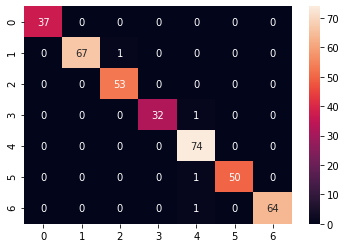

In [59]:
X_5 = d_5.drop(columns = ['label']).values
y_5 = d_5['label'].values
Scores=My_model(X_5,y_5)

